# Aula 5

In [1]:
import pandas as pd
%matplotlib inline
%precision %2.f
pd.options.display.float_format = '{:,.2f}'.format

dados = pd.read_csv("/home/pinguim/Documentos/MeusEstudos/QuarentenaDados/MICRODADOS_ENEM_2018_SAMPLE_43278.csv")
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180009327796,2018,2112209,Timon,21,MA,34.00,M,1.00,1,...,A,B,A,A,C,A,B,B,A,A
1,180012890374,2018,3557105,Votuporanga,35,SP,14.00,M,0.00,1,...,A,C,A,B,E,B,D,B,D,D
2,180008223824,2018,2506301,Guarabira,25,PB,20.00,F,0.00,2,...,A,B,A,A,D,A,B,B,A,E
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.00,F,0.00,2,...,A,B,A,A,E,A,A,A,B,A
4,180013499517,2018,3523107,Itaquaquecetuba,35,SP,19.00,M,0.00,3,...,A,B,A,A,D,B,B,B,A,A


In [2]:
dados.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [3]:
colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
dados_notas = dados[colunas_de_notas].dropna()
dados_notas.columns = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao']
dados_notas.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00


In [4]:
x_4_notas = dados_notas[['ciencias_naturais', 'ciencias_humanas', 'matematica', 'redacao']]
x_4_notas.head()

,ciencias_naturais,ciencias_humanas,matematica,redacao
1,523.10,671.30,738.00,680.00
2,409.20,531.70,438.10,600.00
3,452.30,505.50,544.90,400.00
6,428.50,505.20,436.80,560.00
8,491.80,575.70,487.60,660.00


In [5]:
y_adivinhar = dados_notas['linguagem_codigo']
y_adivinhar

1        661.60
2        389.00
3        448.50
6        521.00
8        524.40
          ...  
137835   504.80
137836   528.50
137838   538.30
137840   468.10
137842   527.70
Name: linguagem_codigo, Length: 97270, dtype: float64

In [6]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(43267)

x_treino, x_teste, y_treino, y_teste = train_test_split(x_4_notas, y_adivinhar,
                                                        random_state = 326784)

print(x_treino.shape)
print(x_teste.shape)
print(y_treino.shape)
print(y_teste.shape)

(72952, 4)
(24318, 4)
(72952,)
(24318,)


In [7]:
x_treino.head()

,ciencias_naturais,ciencias_humanas,matematica,redacao
25012,610.20,651.90,741.40,660.00
52044,571.70,639.60,639.10,680.00
86543,385.90,569.10,502.00,360.00
36362,424.70,446.20,589.80,420.00
96734,831.40,850.40,943.20,940.00


In [8]:
from sklearn.svm import LinearSVR

modelo = LinearSVR()
modelo.fit(x_treino, y_treino)

/home/pinguim/miniconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [9]:
predicoes_notas_linguagem = modelo.predict(x_teste)
predicoes_notas_linguagem[:5]

array([591.30581763, 606.46025242, 639.89298788, 555.97651583,
       472.52000416])

In [10]:
y_teste[:5]

67300    577.20
113766   624.40
48328    703.00
9454     598.60
9515     458.60
Name: linguagem_codigo, dtype: float64

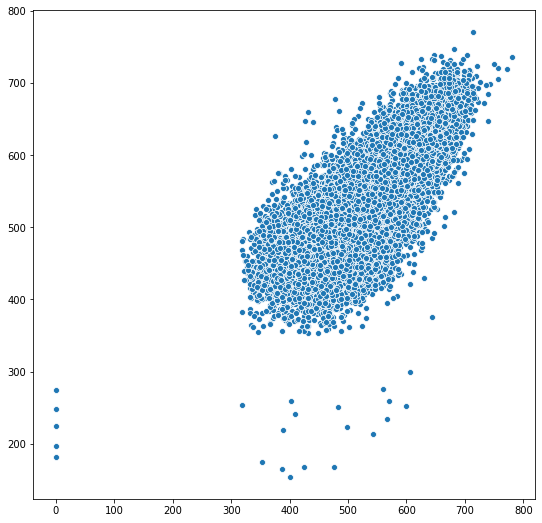

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=predicoes_notas_linguagem)

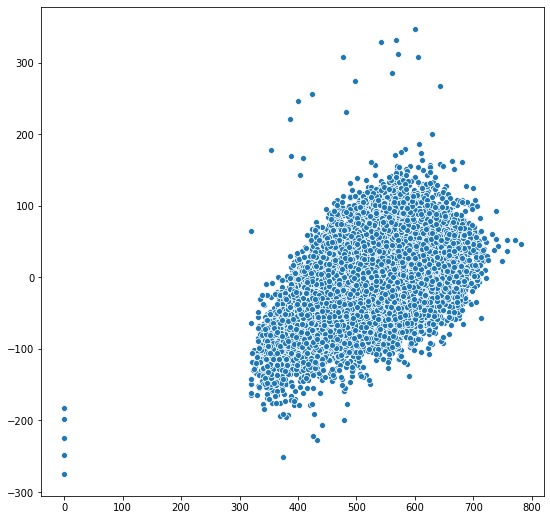

In [12]:
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=y_teste.values - predicoes_notas_linguagem)

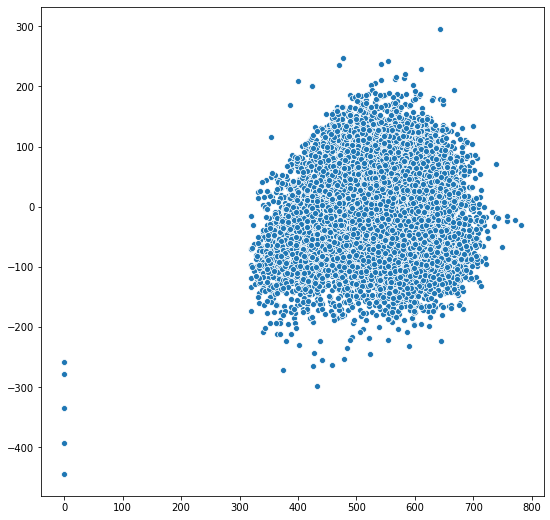

In [13]:
# predição Guilherme TOSCA. Dummy!
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=y_teste - x_teste.mean(axis=1))


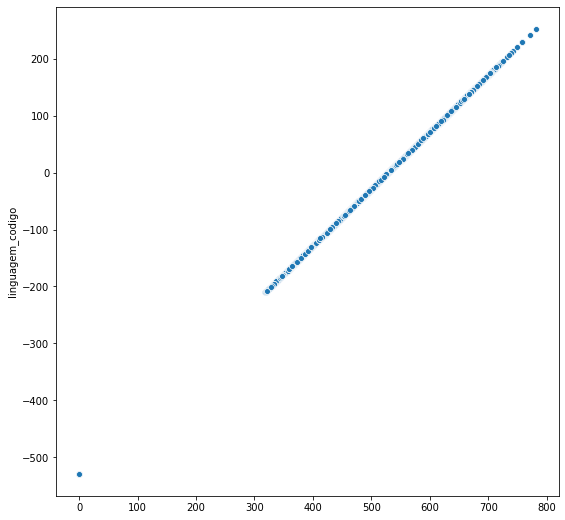

In [14]:
# predição do paulo TOSCA. Dummy!
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=y_teste - y_treino.mean())


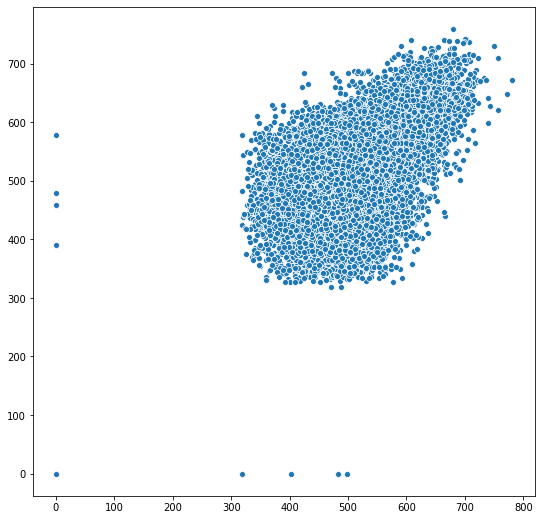

In [15]:
from sklearn.tree import DecisionTreeRegressor

modelo = DecisionTreeRegressor()
modelo.fit(x_treino, y_treino)
predicoes_notas_linguagem = modelo.predict(x_teste)
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=predicoes_notas_linguagem)

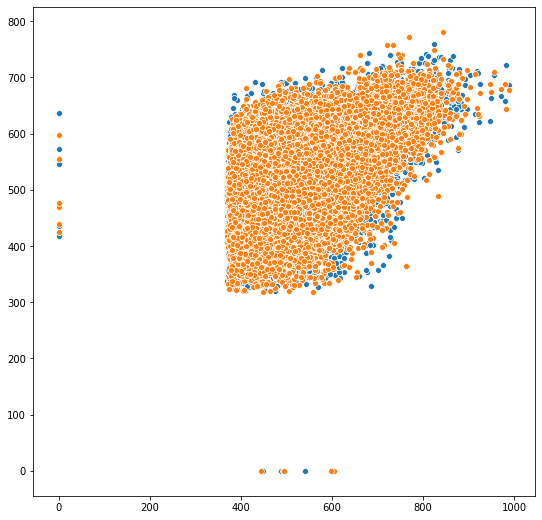

In [16]:
plt.figure(figsize=(9,9))
sns.scatterplot(x=x_teste['matematica'].values, y=predicoes_notas_linguagem)
sns.scatterplot(x=x_teste['matematica'].values, y=y_teste.values)

In [17]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_teste, predicoes_notas_linguagem)

4160.601726293281

In [18]:
mean_squared_error(y_teste, y_teste)

0.0

In [19]:
from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

mean_squared_error(y_teste, dummy_predicoes)

5137.479089212121

## Desafio 1 da [Allan Spadini](https://twitter.com/allanspadini)

Explore os parâmetros C e o max_iter do modelo LinesSVR. Não há garantias que o resultado será melhor.

In [20]:
from sklearn.svm import LinearSVR

modelo = LinearSVR(C=1.0, max_iter=10000)
modelo.fit(x_treino, y_treino)

/home/pinguim/miniconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=None, tol=0.0001, verbose=0)

Nos meus testes não consegui verificar se com um número superior a 100000 iterações se a mensagem de Warning continuaria, pos estava levando um tempo superior a 10 minutos sem retorno(como estou realizando em minha máquina pessoal). Assim sendo restartei o kernel e tentei com 10000 iterações, que como observado acima ainda retorna o Warning.

## Desafio 2 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

No gráfico em que plotamos a média com o valor previsto, plote a média das 4 notas ao invés de uma.

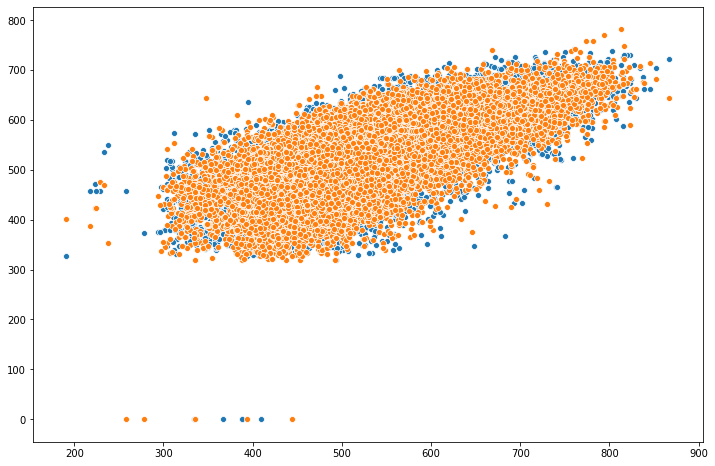

In [37]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=x_teste.mean(axis = 1).values, y=predicoes_notas_linguagem)
sns.scatterplot(x=x_teste.mean(axis = 1).values, y=y_teste.values)

Observamos que os dados os dados de média e os dados de nosso teste quase que se sobrepoem, indicando que nosso modelo é razoavél.

## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)


Remover as notas zero e testar os mesmos modelos, comparando o resultado

In [24]:
# Seguindo a dica da Thais
import numpy as np

dados_notas_sem_0 = dados_notas.copy()


dados_notas_sem_0['ciencias_naturais'] = dados_notas['ciencias_naturais'].replace(0., np.NAN)
dados_notas_sem_0['ciencias_humanas'] = dados_notas['ciencias_humanas'].replace(0., np.NAN)
dados_notas_sem_0['linguagem_codigo'] = dados_notas['linguagem_codigo'].replace(0., np.NAN)
dados_notas_sem_0['matematica'] = dados_notas['matematica'].replace(0., np.NAN)

dados_notas_sem_0.dropna(subset=['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica'], inplace=True)

dados_notas_sem_0[['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica']].head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica
1,523.10,671.30,661.60,738.00
2,409.20,531.70,389.00,438.10
3,452.30,505.50,448.50,544.90
6,428.50,505.20,521.00,436.80
8,491.80,575.70,524.40,487.60


In [25]:
x_4_notas_sem_0 = dados_notas_sem_0[['ciencias_naturais', 'ciencias_humanas', 'matematica', 'redacao']]
x_4_notas_sem_0.head()

,ciencias_naturais,ciencias_humanas,matematica,redacao
1,523.10,671.30,738.00,680.00
2,409.20,531.70,438.10,600.00
3,452.30,505.50,544.90,400.00
6,428.50,505.20,436.80,560.00
8,491.80,575.70,487.60,660.00


In [26]:
y_adivinhar_1 = dados_notas_sem_0['linguagem_codigo']

np.random.seed(43267)

x_treino_1, x_teste_1, y_treino_1, y_teste_1 = train_test_split(x_4_notas_sem_0, y_adivinhar_1,
                                                        random_state = 326784)

print(x_treino_1.shape)
print(x_teste_1.shape)
print(y_treino_1.shape)
print(y_teste_1.shape)

(72870, 4)
(24291, 4)
(72870,)
(24291,)


In [27]:
predicoes_notas_linguagem_1 = modelo.predict(x_teste_1)
predicoes_notas_linguagem_1[:5]

array([505.69238073, 468.71969787, 556.90088524, 614.05853577,
       491.02363287])

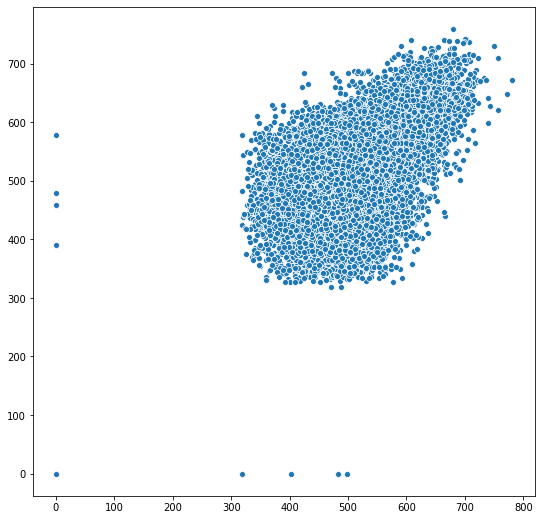

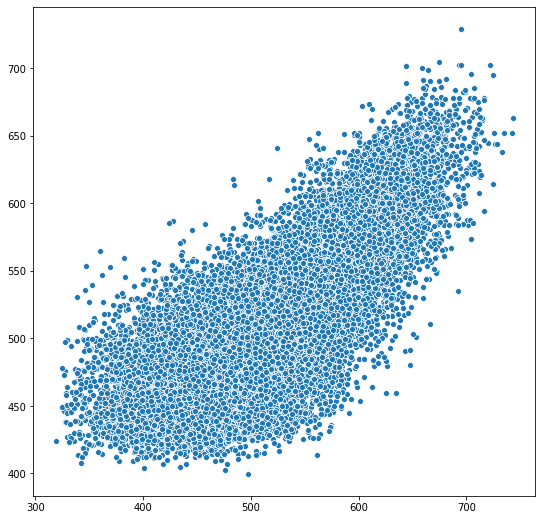

In [28]:
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=predicoes_notas_linguagem)

plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste_1.values, y=predicoes_notas_linguagem_1)


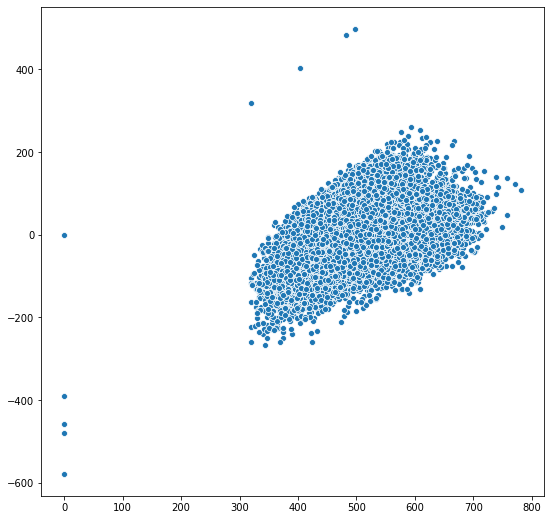

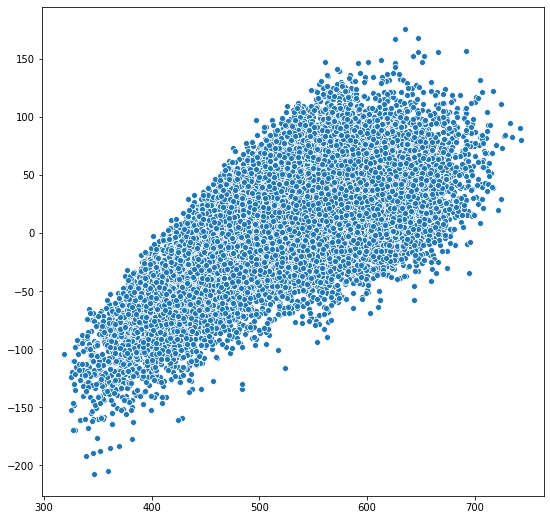

In [29]:
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=y_teste.values - predicoes_notas_linguagem)

plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste_1.values, y=y_teste_1.values - predicoes_notas_linguagem_1)

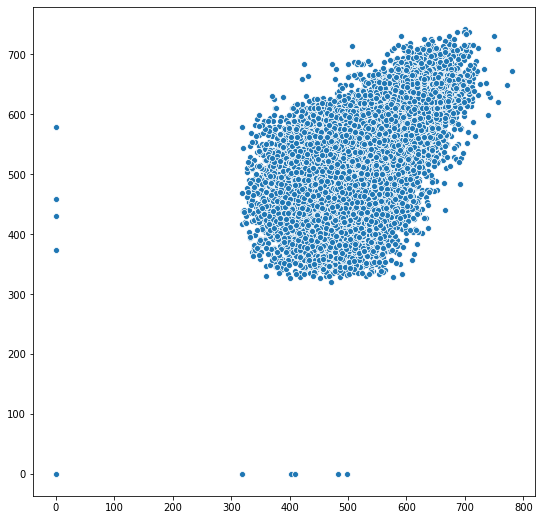

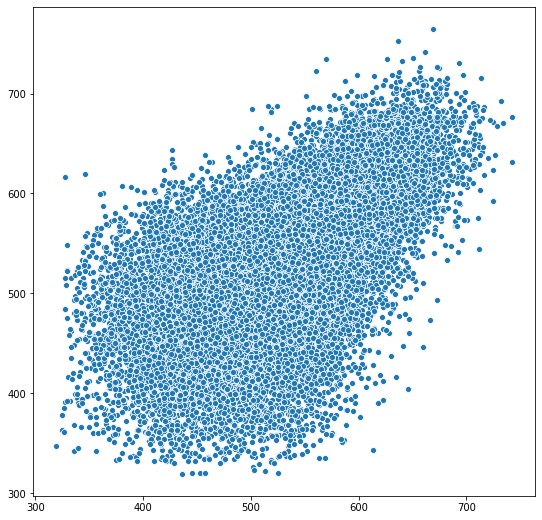

In [30]:
from sklearn.tree import DecisionTreeRegressor

modelo = DecisionTreeRegressor()
modelo.fit(x_treino, y_treino)
predicoes_notas_linguagem = modelo.predict(x_teste)
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=predicoes_notas_linguagem)

modelo = DecisionTreeRegressor()
modelo.fit(x_treino_1, y_treino_1)
predicoes_notas_linguagem_1 = modelo.predict(x_teste_1)
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste_1.values, y=predicoes_notas_linguagem_1)



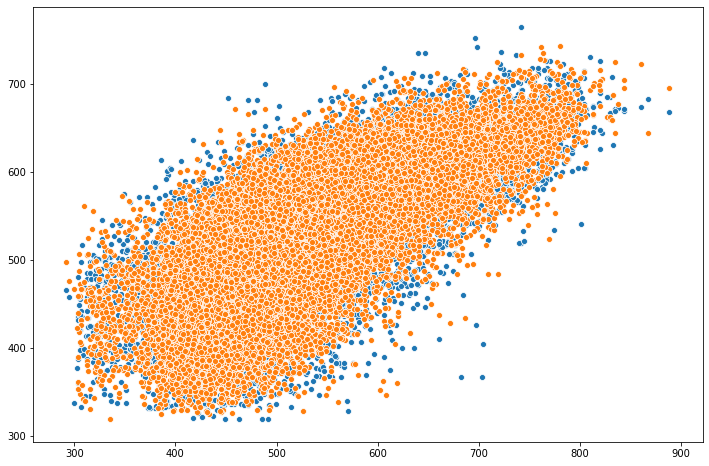

In [38]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=x_teste_1.mean(axis = 1).values, y=predicoes_notas_linguagem_1)
sns.scatterplot(x=x_teste_1.mean(axis = 1).values, y=y_teste_1.values)

In [31]:
mean_squared_error(y_teste_1, predicoes_notas_linguagem_1)

3998.1477436087443

In [32]:
mean_squared_error(y_teste, predicoes_notas_linguagem)

4151.85615922362

In [33]:
from sklearn.metrics import r2_score
r2_score(y_teste_1, predicoes_notas_linguagem_1)

0.21571700385301773

In [34]:
r2_score(y_teste, predicoes_notas_linguagem)

0.19184876604063783

É observável que a retirada dos zeros provoca uma melhora nos resultados do modelo.

## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Interpretar tudo que foi feito e compartilhar suas conclusões

Após os vários testes, tanto os reproduzidos da video aula, quanto os dos desafios. Observamos que o tratamento de dados é crucial para um bom modelo de ML, embora com resultados ainda ruins, constatamos que a retirada das notas zero melhorou o modelo o qual estamos trabalhando. Talvez a decision tree(embora retornou melhores resultados que a linear regression) não seja o melhor algoritmo para a quantidade de dados trabalhadas. Irei realizar testes com a random forest onde podemos trabalhar com várias árvores de decisão simultâneamente, o que pode melhorar nossa acurácia no modelo. 

## Desafio 5 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Calcule as métricas de erro que utilizamos (mean square root error) também no conjunto de treino, e veja o que acontece comparado com o conjunto de teste.

In [40]:
from sklearn.tree import DecisionTreeRegressor

modelo = DecisionTreeRegressor()
modelo.fit(x_treino, y_treino)
predicoes_notas_linguagem = modelo.predict(x_treino)  
mean_squared_error(y_treino, predicoes_notas_linguagem)

0.0

Chegamos ao resultado 0 que indicaria segundo a métrica utilizada que o modelo seria perfeito, porém aqui vale lembrar o que foi dito pelo Guilherme na video aula sobre os modelos que tem acuracidade muito alta nos treinos e que no mundo real são ineficientes. No caso testado o modelo fez previsões a partir de dados os quais ele já possuia, em outras palavras ele não fez uma previsão.